## introduction

This jupyter notebook is just for demonstration purposes of one way of making reproducible code. In this example, I'm using Ben Schmidt's [wordVectors](https://github.com/bmschmidt/wordVectors) package to explore some of the language of the blogposts made by participants in [MSUDAI](http://digitalarchaeology.msu.edu/). 

## getting started

First, we tell R the various packages we're going to use:

In [1]:
library(magrittr)
library(wordVectors)
library(tsne)
library(dplyr)
library(ggplot2)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Warning message:
: package ‘ggplot2’ was built under R version 3.2.4

Then, we need to get our text prepped and loaded up. In my msudai directory, I have a subdirectory called _blogtextvectors_ in which is one file, `cleanblogtext.txt`. This file has each individual blog post as a single line of text. The first line of code below cleans out a lot of cruft (punctuation, upper case letters, etc. The next line actually takes my data and turns it into a binary file filled with vectors.

In [2]:
prep_word2vec("blogtextvectors","cleanblogtext.txt",lowercase=T)
blogmodel = train_word2vec("cleanblogtext.txt",output="blogposts2_vectors.bin",threads = 4,vectors = 1500,window=12,force=TRUE)


Beginning tokenization to text file at cleanblogtext.txt
Loading required package: stringi
Warning message:
: package ‘stringi’ was built under R version 3.2.5
blogtextvectors/cleanblogtext.txt.Filename ends with .bin, so reading in binary format
Reading a word2vec binary file of 1540 rows and 1500 columns


  |======================================================================| 100%


The next two lines of code check to make sure everything worked. If you're seeing lots of numbers, and then lists of words, then we're good to go.

In [3]:
##Check
blogmodel


,0.000266845716396347,0.000294626865070313,-0.000255350751103833,-0.000218536370084621,9.11051465664059e-05,0.000201405840925872,6.27237968728878e-05,1.40889487738605e-05,-0.000240234381635673,0.000147898361319676,⋯,0.000296244310447946,-0.00017800903879106,9.19189478736371e-05,0.000206776938284747,0.000231506346608512,0.00032805377850309,0.000231933590839617,0.000197540284716524,3.72110989701468e-05,-0.000287628179648891
the,0.00318951532244682,-0.0193440113216639,0.0191769059747458,0.0212089717388153,-0.0848554372787476,0.00135807378683239,-0.000859153922647238,-0.0209052041172981,0.0603688880801201,-0.0844720229506493,⋯,0.0274816509336233,0.0621003545820713,0.0416386686265469,-0.0477883331477642,0.0127154961228371,0.0338575765490532,-0.0265629701316357,-0.028754934668541,0.0332278981804848,-0.026313491165638
to,-0.11985544860363,-0.0683773458003998,0.0878150537610054,0.00429299706593156,-0.128272250294685,0.0108385356143117,0.028595108538866,-0.106329642236233,-0.104449681937695,-0.00763161852955818,⋯,-0.00252825696952641,-0.00544378813356161,0.0290167443454266,-0.000335307122441009,0.0209921076893806,0.036441694945097,0.00216657854616642,-0.000648228917270899,0.049962542951107,-0.0129141416400671
and,-0.0376742295920849,-0.0658566281199455,0.0693775415420532,-0.0683466419577599,-0.158496484160423,0.0623234063386917,0.0521503239870071,-0.141399040818214,0.0360614620149136,-0.00640228111296892,⋯,0.0537579581141472,-0.0120741156861186,0.053548738360405,-0.00737914070487022,0.0232287403196096,0.0232137013226748,-0.00267398287542164,-0.0168408695608377,0.0480136908590794,-0.0188768096268177
of,-0.0187738575041294,0.00731154205277562,0.0522048696875572,0.0306995380669832,-0.0880703032016754,0.0448791682720184,0.0864254385232925,-0.0153074478730559,-0.00625724205747247,-0.115746773779392,⋯,0.00524295307695866,-0.0096198171377182,0.0448155552148819,-0.0740451887249947,0.0503592975437641,0.0264565404504538,-0.0250635519623756,-0.0185660552233458,0.0857237428426743,0.015869777649641
i,-0.0229256916791201,0.0283635575324297,0.06557697057724,-0.142920970916748,-0.0463472530245781,-0.0655335634946823,0.0280853360891342,-0.0323355980217457,0.0393991880118847,-0.00900337565690279,⋯,0.0117076793685555,0.00253411149606109,0.0157152321189642,0.0166197959333658,0.0089644780382514,0.00679229199886322,0.0105236293748021,-0.00386207806877792,0.0579539090394974,-0.000344643747666851
a,-0.0736726969480515,0.031382080167532,0.0446692518889904,-0.04096395149827,-0.000630980299320072,-0.0154997268691659,0.099927082657814,0.0157079584896564,0.0336151644587517,-0.0474945940077305,⋯,0.000371895497664809,-0.00953215919435024,0.0788459852337837,-0.0420207865536213,0.0455725118517876,0.0461653843522072,-0.014379053376615,0.00470745004713535,0.00513454107567668,-0.0336729325354099
in,-0.0579615272581577,0.00109218072611839,0.0682255923748016,-0.0452253669500351,-0.156125724315643,0.0646324977278709,0.053563553839922,-0.0707197487354279,-0.0375076495110989,0.0451308898627758,⋯,0.0244095157831907,0.0208737552165985,0.00100395327899605,-0.0115193473175168,0.0130228158086538,-0.00636578863486648,0.00815329141914845,-0.0279829483479261,0.0604939088225365,0.0094913337379694
that,-0.111177310347557,-0.0701097100973129,0.113549940288067,-0.0676931887865067,-0.17309345304966,-0.00841708295047283,0.0572389550507069,-0.0842446610331535,0.050360806286335,-0.0562706962227821,⋯,0.00934548676013947,0.0179352015256882,0.0370950512588024,-0.0104983290657401,-0.00488368608057499,0.0534192249178886,-0.0403446964919567,0.00772944511845708,-0.0111319543793797,-0.0163847729563713
for,-0.164146289229393,-0.0464446283876896,0.139452964067459,-0.123959735035896,-0.178006052970886,0.00852401461452246,0.0677123814821243,-0.152907103300095,-0.229217797517776,0.0658351927995682,⋯,-0.0348699875175953,-0.0113542592152953,0.0448309518396854,-0.0237194783985615,0.0419303067028522,0.0404503047466278,-0.0286099333316088,-0.0338146202266216,0.019575908780098,0.00801653601229191
my,-0.0140658

[1] "</s>"            "the"             "to"              "and"            
   [5] "of"              "i"               "a"               "in"             
   [9] "that"            "for"             "my"              "is"             
  [13] "with"            "on"              "this"            "have"           
  [17] "project"         "as"              "be"              "data"           
  [21] "it"              "will"            "from"            "at"             
  [25] "are"             "we"              "was"             "can"            
  [29] "but"             "an"              "digital"         "so"             
  [33] "been"            "by"              "or"              "about"          
  [37] "not"             "our"             "more"            "some"           
  [41] "work"            "website"         "archaeology"     "also"           
  [45] "time"            "has"             "me"              "site"           
  [49] "how"             "what"            "which"           "am"             
  [53] "into"            "there"           "one"             "other"          
  [57] "research"        "these"           "out"             "up"             
  [61] "do"              "you"             "all"             "archaeological" 
  [65] "use"             "like"            "had"             "database"       
  [69] "through"         "open"            "working"         "new"            
  [73] "information"     "would"           "well"            "map"            
  [77] "using"           "were"            "last"            "they"           
  [81] "next"            "make"            "institute"       "if"             
  [85] "over"            "web"             "where"           "when"           
  [89] "them"            "much"            "now"             "get"            
  [93] "first"           "used"            "need"            "content"        
  [97] "public"          "because"         "see"             "who"            
 [101] "i’m"             "people"          "most"            "artifacts"      
 [105] "than"            "process"         "many"            "while"          
 [109] "each"            "able"            "3d"              "different"      
 [113] "way"             "projects"        "then"            "collection"     
 [117] "could"           "month"           "access"          "style"          
 [121] "their"           "create"          "fort"            "university"     
 [125] "past"            "very"            "still"           "few"            
 [129] "own"             "students"        "based"           "since"          
 [133] "post"            "history"         "field"           "tools"          
 [137] "only"            "lot"             "online"          "here"           
 [141] "width"           "just"            "such"            "archaeologists" 
 [145] "museum"          "images"          "i'm"             "plan"           
 [149] "made"            "going"           "however"         "part"           
 [153] "things"          "community"       "really"          "year"           
 [157] "page"            "help"            "i've"            "code"           
 [161] "text"            "collections"     "being"           "historical"     
 [165] "creating"        "sites"           "good"            "two"            
 [169] "program"         "goal"            "include"         "historic"       
 [173] "its"             "want"            "although"        "i’ve"           
 [177] "several"         "platform"        "should"          "mapbox"         
 [181] "know"            "repository"      "trying"          "before"         
 [185] "set"             "building"        "gis"             "may"            
 [189] "progress"        "issues"          "think"           "even"           
 [193] "during"          "point"           "once"            "name"           
 [197] "provide"         "making"          "after"           "photos"         
 [201] "back"            "both"            "design"  

In [4]:
rownames(blogmodel)

[1] "</s>"            "the"             "to"              "and"            
   [5] "of"              "i"               "a"               "in"             
   [9] "that"            "for"             "my"              "is"             
  [13] "with"            "on"              "this"            "have"           
  [17] "project"         "as"              "be"              "data"           
  [21] "it"              "will"            "from"            "at"             
  [25] "are"             "we"              "was"             "can"            
  [29] "but"             "an"              "digital"         "so"             
  [33] "been"            "by"              "or"              "about"          
  [37] "not"             "our"             "more"            "some"           
  [41] "work"            "website"         "archaeology"     "also"           
  [45] "time"            "has"             "me"              "site"           
  [49] "how"             "what"            "which"           "am"             
  [53] "into"            "there"           "one"             "other"          
  [57] "research"        "these"           "out"             "up"             
  [61] "do"              "you"             "all"             "archaeological" 
  [65] "use"             "like"            "had"             "database"       
  [69] "through"         "open"            "working"         "new"            
  [73] "information"     "would"           "well"            "map"            
  [77] "using"           "were"            "last"            "they"           
  [81] "next"            "make"            "institute"       "if"             
  [85] "over"            "web"             "where"           "when"           
  [89] "them"            "much"            "now"             "get"            
  [93] "first"           "used"            "need"            "content"        
  [97] "public"          "because"         "see"             "who"            
 [101] "i’m"             "people"          "most"            "artifacts"      
 [105] "than"            "process"         "many"            "while"          
 [109] "each"            "able"            "3d"              "different"      
 [113] "way"             "projects"        "then"            "collection"     
 [117] "could"           "month"           "access"          "style"          
 [121] "their"           "create"          "fort"            "university"     
 [125] "past"            "very"            "still"           "few"            
 [129] "own"             "students"        "based"           "since"          
 [133] "post"            "history"         "field"           "tools"          
 [137] "only"            "lot"             "online"          "here"           
 [141] "width"           "just"            "such"            "archaeologists" 
 [145] "museum"          "images"          "i'm"             "plan"           
 [149] "made"            "going"           "however"         "part"           
 [153] "things"          "community"       "really"          "year"           
 [157] "page"            "help"            "i've"            "code"           
 [161] "text"            "collections"     "being"           "historical"     
 [165] "creating"        "sites"           "good"            "two"            
 [169] "program"         "goal"            "include"         "historic"       
 [173] "its"             "want"            "although"        "i’ve"           
 [177] "several"         "platform"        "should"          "mapbox"         
 [181] "know"            "repository"      "trying"          "before"         
 [185] "set"             "building"        "gis"             "may"            
 [189] "progress"        "issues"          "think"           "even"           
 [193] "during"          "point"           "once"            "name"           
 [197] "provide"         "making"          "after"           "photos"         
 [201] "back"            "both"            "design"  

## exploring

Now, let's start exploring. My interest in looking at word vectors here is to see whether or not I can discern within the 114 blog posts (30 in 2015, 84 in 2016; avg. words per post 450 and 520 respectively) imposter syndrome and ideas of 'fail' rearing their heads. So let's see what a vector concerning the word 'feel' looks like. That is to say, we're going to look at the patterns of word use that go together with the appearance of that word. (Word vectors can be thought up as a complement to the top-down perspective that topic models provide).

In [8]:
nearest_to(blogmodel,blogmodel[["feel", "feeling"]])

feelwords = blogmodel %>% nearest_to(blogmodel[[c("feel", "feeling")]],100) %>% names
sample(feelwords,50)

feel       finding       there’s      decision     mentioned 
 3.330669e-16  9.423434e-02  1.078595e-01  1.130498e-01  1.248129e-01 
      playing experimenting          said        schema        follow 
 1.355844e-01  1.361065e-01  1.378118e-01  1.462179e-01  1.552474e-01

[1] "none"          "say"           "track"         "everything"   
 [5] "searching"     "spend"         "feeling"       "ready"        
 [9] "probably"      "it’s"          "excited"       "happy"        
[13] "write"         "feel"          "fear"          "solutions"    
[17] "actual"        "playing"       "vision"        "ethan"        
[21] "solution"      "published"     "metadata"      "meant"        
[25] "issue"         "technological" "fun"           "follow"       
[29] "adding"        "yet"           "notes"         "there’s"      
[33] "details"       "didn’t"        "definitely"    "close"        
[37] "became"        "finding"       "experimenting" "skills"       
[41] "deadlines"     "report"        "master"        "clean"        
[45] "starting"      "cross"         "writing"       "schema"       
[49] "start"         "thinking"

... there's a lot of ambiguity' there. The fact that 'playing' and 'yet' and 'fun' and 'experimenting' are all present rather suggests to me that while there's some nervousness - 'master' (mastery? getting comfortable with something?) - it's not an overwhelming one (contra, 'fear'). So let's explore this a bit more.

In [7]:
nearest_to(blogmodel,blogmodel[["i"]])

i_words = blogmodel %>% nearest_to(blogmodel[[c("i")]],100) %>% names
sample(i_words,50)

i       coding          let           me    documents      looking 
5.551115e-16 4.239768e-01 4.542810e-01 4.565079e-01 4.600660e-01 4.622270e-01 
      trying          try        isn't         play 
4.737939e-01 4.774073e-01 4.811111e-01 4.811353e-01

[1] "shift"         "frustrating"   "my"            "helped"       
 [5] "seemed"        "nunaliit"      "learning"      "went"         
 [9] "lists"         "going"         "good"          "initial"      
[13] "hoping"        "getting"       "bit"           "thinking"     
[17] "i’ve"          "edit"          "head"          "advice"       
[21] "pro"           "me"            "i"             "permissions"  
[25] "to"            "mina"          "beginning"     "get"          
[29] "i'm"           "tutorials"     "design"        "try"          
[33] "filemaker"     "been"          "started"       "got"          
[37] "i've"          "experimenting" "existing"      "isn't"        
[41] "software"      "don't"         "unfortunately" "news"         
[45] "back"          "own"           "continuing"    "actual"       
[49] "quite"         "figure"

In the results above, perhaps there's a bit more nervousness percolating through. Word vectors let you tease out other interesting perspectives when you start comparing them. The cannonical example is to think of the comparison as a kind of equation: 'King' - 'man' + 'woman' = 'Queen'. That is to say, take the words tied to king, remove the words tied to man, add the words tied to woman, and the list you end up with is a list describing this concept queen. By the same token, you can use this approach to tease out vectors for 'bank' meaning a place to store money as opposed to that thing marking the side of a river. So... let's see.

In [9]:
word_scores = data.frame(word=rownames(blogmodel))

fail_vector = blogmodel[[c("easy","does","can","able","easily")]]-blogmodel[[c("cannot","unable","hard","doesn't")]]

us_vector = blogmodel[[c("I","me")]] - blogmodel[[c("them", "they", "their")]]

In the code above, we are creating two vectors. The first, `fail_vector` is the space that runs from words denoting ability to words denoting inability. This is my attempt at defining `fail` as a wordvector. In the second vector, `us_vector`, we define a space running from me to them. So... with my cardinal points defined, what do we find?

In [11]:
word_scores$us_score = blogmodel %>% cosineSimilarity(us_vector) %>% as.vector

word_scores$fail_score = cosineSimilarity(blogmodel,fail_vector) %>% as.vector

groups = c("us_score","fail_score")


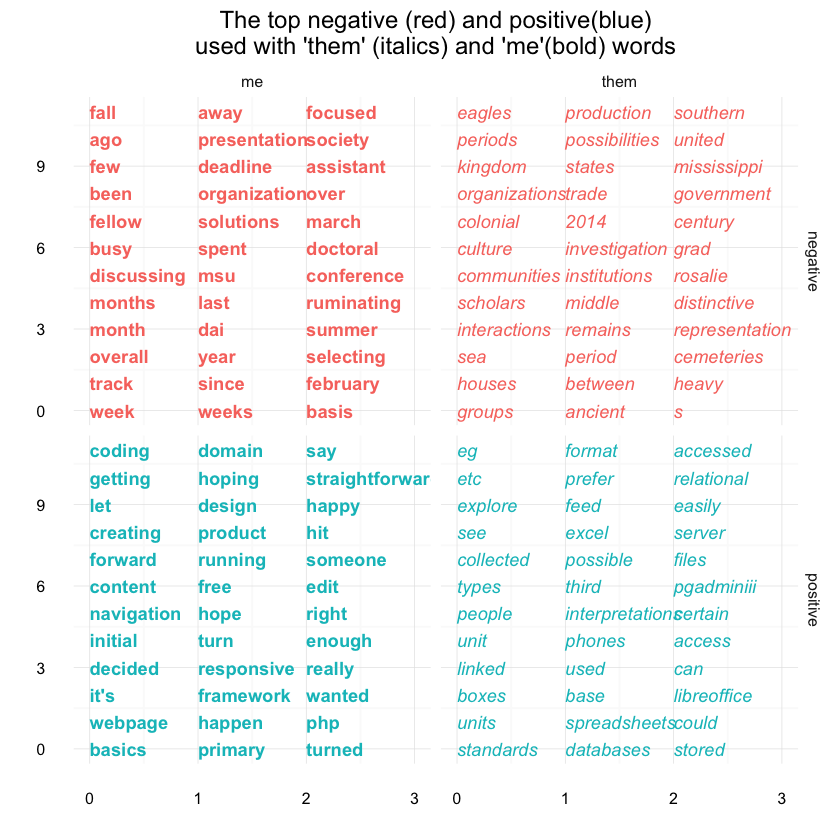

In [13]:
word_scores %>% mutate( usedness=ifelse(us_score>0,"me","them"),fail=ifelse(fail_score>0,"positive","negative")) %>% group_by(fail,usedness) %>% filter(rank(-(abs(us_score*fail_score)))<=36) %>% mutate(eval=-1+rank(abs(fail_score)/abs(us_score))) %>% ggplot() + geom_text(aes(x=eval %/% 12,y=eval%%12,label=word,fontface=ifelse(usedness=="me",2,3),color=fail),hjust=0) + facet_grid(fail~usedness) + theme_minimal() + scale_x_continuous("",lim=c(0,3)) + scale_y_continuous("") + labs(title="The top negative (red) and positive(blue)\nused with 'them' (italics) and 'me'(bold) words") + theme(legend.position="none")


So, here we are. Maybe my one vector should run from 'I, me, mine' to 'it, its', to capture the distinction between the person and the tech. Be that as it may, I am heartened to see that words like 'explore' and 'possilbe' fit into the space of positive discourse around things external to the writers, while 'creating', 'getting' (as in, getting it?), 'turn', 'happy' revolve around the space defined by 'I'. The negative words capture perhaps that perennial bane procrastination, while the negative words external to the writers might perhaps capture ideas about academe in general?

## conclusion

Your mileage will vary, of course. My goal has been to demonstrate some distant reading of MSUDAI participants' solitary experiences, to show that a) y'all are not alone and b) things have been a lot more positive that you might've thought. 

(Of course, there's a performative impulse in blogging where sharing the things that don't work might be resisted, right? In which case I should've been doing all of this text analysis on the MSUDAI forum posts rather than the blogs.  But that in itself is interesting because it suggests that, once you've found 'your people', you are far more free to share, to admit vulnerability in that safe space.) 

But, we need to be doing more of this out in the open. More on that on Wednesday next week.